In [2]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tool

In [4]:
# import the dataset
dataset = tool.readEleData(r'D:\JunShen\dataset\彰化_雲林用電量(非專用電表_day_raw.csv')

讀取用電資料: D:\JunShen\dataset\彰化_雲林用電量(非專用電表_day_raw.csv
讀取 500 筆資料之花費時間: 0.13 分鐘
讀取 1000 筆資料之花費時間: 0.25 分鐘
讀取 1500 筆資料之花費時間: 0.37 分鐘
讀取 2000 筆資料之花費時間: 0.5 分鐘
讀取 2500 筆資料之花費時間: 0.62 分鐘
讀取 3000 筆資料之花費時間: 0.82 分鐘
讀取 3500 筆資料之花費時間: 0.94 分鐘
讀取 4000 筆資料之花費時間: 1.07 分鐘
讀取 4500 筆資料之花費時間: 1.13 分鐘
Stop iteration!
串接資料花費時間: 1.13 分鐘
用電資料讀取完成!!


In [5]:
dataset.head()

,date,98666106.0,98666005.0,98662541.0,98662535.0,98662527.0,98662400.0,98662012.0,98662008.0,98661810.0,...,98646352.0,98652412.0,63439500.0,98664911.0,63440513.0,43119810.0,98155469.0,53547020.0,44318829.0,53559819.0
0,2007-01-01,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
1,2007-01-02,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
2,2007-01-03,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
3,2007-01-04,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323
4,2007-01-05,6.241935,7.403226,4.83871,14.096774,0.774194,4.387097,5.629032,2.854839,1.403226,...,0.193548,0.629032,1.112903,5.112903,5.153226,0.290323,53.919355,0.169355,5.225806,0.290323


In [6]:
dataset.describe()

,98666106.0,98666005.0,98662541.0,98662535.0,98662527.0,98662400.0,98662012.0,98662008.0,98661810.0,98657100.0,...,98646352.0,98652412.0,63439500.0,98664911.0,63440513.0,43119810.0,98155469.0,53547020.0,44318829.0,53559819.0
count,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000,...,4199.000000,4199.000000,4169.000000,4199.000000,4169.000000,4199.000000,4199.000000,4199.000000,4199.000000,4199.000000
mean,11.232674,8.073351,6.560610,16.359371,0.979281,5.834484,18.702548,2.319124,2.881162,6.923077,...,0.322577,0.834961,2.656512,7.428912,2.487347,0.901048,20.765063,0.606097,37.929031,1.110026
std,3.257253,2.158233,4.121189,3.320411,0.396694,1.812683,12.042409,1.256472,2.129362,1.156085,...,0.207116,0.277575,1.497751,3.766262,1.833872,1.746943,17.143601,0.284939,32.922596,0.935963
min,6.241935,4.887097,3.016129,8.096774,0.209677,0.967742,0.000000,0.080645,1.096774,4.435484,...,0.000000,0.185484,0.532258,2.290323,0.000000,0.000000,0.466667,0.040323,5.225806,0.000000
25%,8.950000,6.290323,4.403226,14.096774,0.666667,4.983333,12.306452,1.583333,1.793103,6.161290,...,0.177419,0.645161,1.524194,5.500000,1.224138,0.072581,7.714286,0.391667,15.928571,0.375000
50%,10.683333,7.354839,4.967742,16.833333,0.919355,6.196429,14.482759,2.016129,2.266667,6.935484,...,0.290323,0.846774,2.339286,6.379032,2.298387,0.193548,15.866667,0.596774,25.000000,0.766129
75%,12.709677,10.000000,7.419355,18.774194,1.200000,6.790323,29.209677,2.951613,3.064516,7.806452,...,0.475806,1.008929,3.275000,8.072581,3.298387,0.321429,29.200000,0.758065,48.000000,1.566667
max,21.700000,12.839286,24.435484,25.066667,2.232143,9.283333,48.410714,6.370968,16.083333,9.112903,...,0.875000,1.583333,7.758333,26.000000,12.291667,8.525000,80.066667,1.441667,244.416667,3.400000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Columns: 53464 entries, date to 53559819.0
dtypes: float64(53463), object(1)
memory usage: 1.7+ GB


In [19]:
dataset.date = dataset.date.astype(np.datetime64)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Columns: 53464 entries, date to 53559819.0
dtypes: datetime64[ns](1), float64(53463)
memory usage: 1.7 GB


In [23]:
dataset['year'] = dataset.date.dt.year
dataset['month'] = dataset.date.dt.month

In [24]:
dataset.groupby(['year','month']).sum()

98666106.0  98666005.0  98662541.0  98662535.0  98662527.0  \
year month                                                               
2007 1           193.5       229.5       150.0       437.0        24.0   
     2           193.5       229.5       150.0       437.0        24.0   
     3           510.0       355.5       156.5       500.0        18.5   
     4           510.0       355.5       156.5       500.0        18.5   
     5           429.0       253.5       144.0       546.5        14.5   
...                ...         ...         ...         ...         ...   
2018 2           358.0       359.5       221.5       373.0        20.0   
     3           536.0       384.5       265.5       477.5        20.0   
     4           536.0       384.5       265.5       477.5        20.0   
     5           377.5       366.0       314.5       625.0        20.0   
     6           377.5       366.0       314.5       625.0        20.0   

            98662400.0  98662012.0  98662008.0  98661810.0  98657100.0  ...  \
year month                                                              ...   
2007 1           136.0       174.5        88.5        43.5       201.5  ...   
     2           136.0       174.5        88.5        43.5       201.5  ...   
     3           153.5       192.0        58.0       120.5       222.5  ...   
     4           153.5       192.0        58.0       120.5       222.5  ...   
     5           171.0       158.5       113.0        94.0       211.5  ...   
...                ...         ...         ...         ...         ...  ...   
2018 2            45.5       375.0        45.0       215.0       145.0  ...   
     3            74.0       411.5        40.5       295.5       176.0  ...   
     4            74.0       411.5        40.5       295.5       176.0  ...   
     5           171.0       381.5        20.0       482.5       191.0  ...   
     6           171.0       381.5        20.0       482.5       191.0  ...   

            98646352.0  98652412.0  63439500.0  98664911.0  63440513.0  \
year month                                                               
2007 1            6.00       19.50       34.50      158.50      159.75   
     2            6.00       19.50      136.50      158.50       72.00   
     3            8.00       16.25      136.50      135.25       72.00   
     4            8.00       16.25       66.75      135.25      112.75   
     5            0.00       10.75       66.75      166.00      112.75   
...                ...         ...         ...         ...         ...   
2018 2           14.00       25.75       46.75      193.75       86.75   
     3           18.25       23.50       46.75      198.50       86.75   
     4           18.25       23.50       60.25      198.50       71.50   
     5           21.00       10.00       60.25      187.00       71.50   
     6           21.00       10.00        0.00      187.00        0.00   

            43119810.0  98155469.0  53547020.0  44318829.0  53559819.0  
year month                                                              
2007 1            9.00      1671.5        5.25       162.0        9.00  
     2            9.00      1555.5        5.25       321.5        9.00  
     3            6.00      1319.5        8.25       479.0       11.25  
     4            6.00      1030.0        8.25       432.5       11.25  
     5            5.75       219.0       16.00       540.0       15.25  
...                ...         ...         ...         ...         ...  
2018 2           54.25       151.5       25.75      1035.5       23.00  
     3          136.25       251.5       28.75      1539.5       87.50  
     4          136.25       504.5       28.75      2072.5       87.50  
     5          255.75      1775.0       29.75      4172.0       97.25  
     6          255.75      1410.5       29.75      7332.5       97.25  

[138 rows x 53463 columns]

In [32]:
X = dataset.groupby(['year','month']).sum().values

In [33]:
X.shape

(138, 53463)

In [34]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [28]:
# import the SOM model
from minisom import MiniSom

In [40]:
# init the model
som = MiniSom( x = 4, y = 4, input_len = 53463 , sigma = 1.0, learning_rate = 0.5)

In [41]:
# init the weight
som.random_weights_init(X)

In [42]:
# traing the model
som.train_random(data = X, num_iteration = 100)

In [60]:
y = dataset.year.astype(str).str.cat(dataset.month.astype(str), join='left', sep='-').unique()

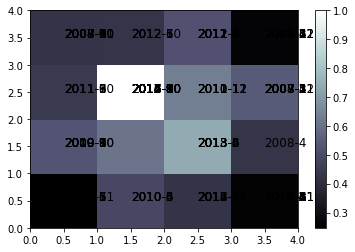

In [62]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plt.text(w[0] + 0.5,
         w[1] + 0.5, y[i], fontsize=12)

show()